In [6]:
import numpy as np
import os, sys
from glob import glob
from tqdm import tqdm
from time import time
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
        'serif'  : ['Palatino'],
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)
import pandas as pd
import pickle as pkl
from hepstats.modeling import bayesian_blocks


def optimal_n_bins(y,max_bins=100):
    from scipy.stats import iqr
    n_bins = int((max(y) - min(y))/(2*iqr(y)*len(y)**(-1/3)))
    return min(n_bins,max_bins)


In [7]:
with open('traces_v1.2.pkl','rb') as fh:
    [e_p_trace, e_n_trace] = pkl.load(fh)

In [8]:
# remove warmup period

warmup = 200
e_p_trace = e_p_trace[warmup:]
e_n_trace = e_n_trace[warmup:]

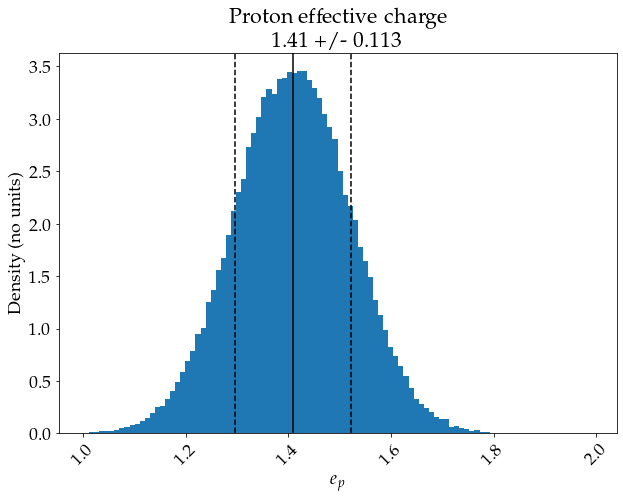

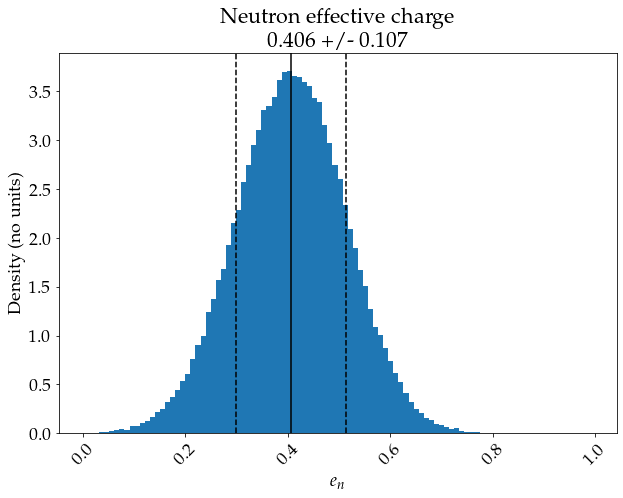

In [9]:
def make_hist(data,title_string,label):
    y = data.flatten()
    n_bins = optimal_n_bins(y)
    plt.figure(figsize=(10,7))
    plt.hist(y,bins=n_bins,density=True)
    y_mean = np.mean(y)
    y_std = np.std(y)
    plt.axvline(y_mean,c='k')
    plt.axvline(y_mean-y_std,c='k',ls='--')
    plt.axvline(y_mean+y_std,c='k',ls='--')
    plt.title(f"{title_string}\n{y_mean:5.3} +/- {y_std:5.3}")
    plt.xlabel(label)
    plt.ylabel('Density (no units)')
    plt.xticks(rotation=45)
    plt.show()

make_hist(e_p_trace,'Proton effective charge',r'$e_p$')
make_hist(e_n_trace,'Neutron effective charge',r'$e_n$')

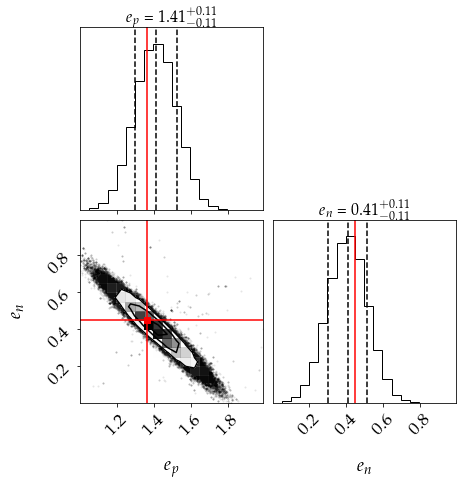

In [12]:
import corner

data = np.array([e_p_trace,e_n_trace]).T
f = plt.figure(figsize=(7,7))
figure = corner.corner(data,
                       labels=[r'$e_p$',r'$e_n$'],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 16},
                       truths=(1.36,0.45),truth_color='r',
                      fig=f)


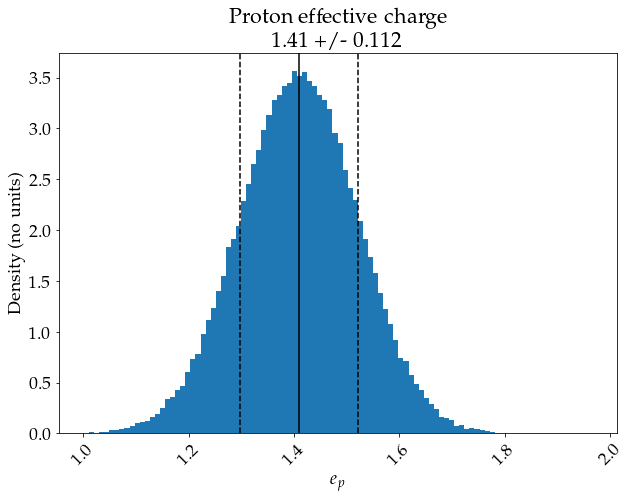

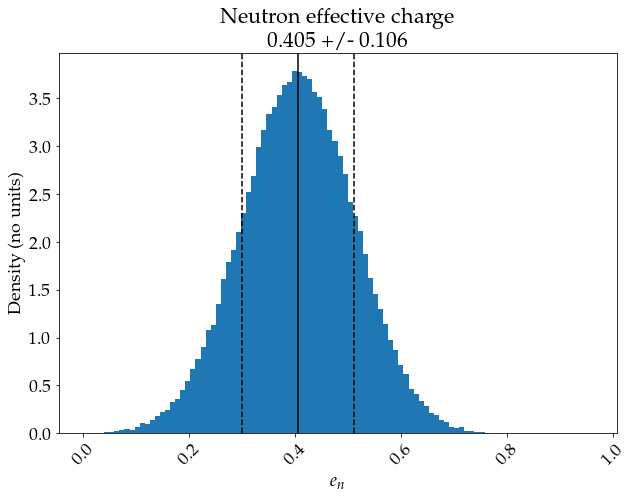

In [14]:
with open('traces_v1.3.pkl','rb') as fh:
    [e_p_trace, e_n_trace] = pkl.load(fh)
    
# remove warmup period

warmup = 200
e_p_trace = e_p_trace[warmup:]
e_n_trace = e_n_trace[warmup:]

def make_hist(data,title_string,label):
    y = data.flatten()
    n_bins = optimal_n_bins(y)
    plt.figure(figsize=(10,7))
    plt.hist(y,bins=n_bins,density=True)
    y_mean = np.mean(y)
    y_std = np.std(y)
    plt.axvline(y_mean,c='k')
    plt.axvline(y_mean-y_std,c='k',ls='--')
    plt.axvline(y_mean+y_std,c='k',ls='--')
    plt.title(f"{title_string}\n{y_mean:5.3} +/- {y_std:5.3}")
    plt.xlabel(label)
    plt.ylabel('Density (no units)')
    plt.xticks(rotation=45)
    plt.show()

make_hist(e_p_trace,'Proton effective charge',r'$e_p$')
make_hist(e_n_trace,'Neutron effective charge',r'$e_n$')


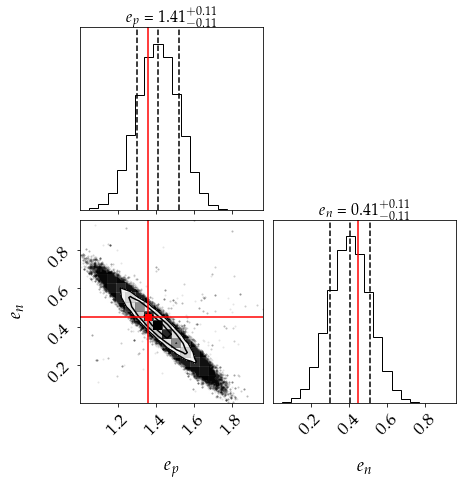

In [15]:
import corner

data = np.array([e_p_trace,e_n_trace]).T
f = plt.figure(figsize=(7,7))
figure = corner.corner(data,
                       labels=[r'$e_p$',r'$e_n$'],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 16},
                       truths=(1.36,0.45),truth_color='r',
                      fig=f)
